In [ ]:
import osnap
import os.path
import flashbang as fb
import nucleosynth.nucleo as sky
import xarray as xr
import numpy as np
import progs.progs as progs
import matplotlib.pyplot as plt

# Hide the yt output
import yt
yt.set_log_level(50)

force_reload_tracers = False
run_date = "14may19"
base_path = f"/mnt/research/SNAPhU/STIR/run_sukhbold/run_{run_date}"
min_tracer_mass = 1.34
max_tracer_mass = 1.39
num_tracers = 10
zams_mass = 9.0
alpha = 1.25

progenitor = progs.ProgModel(zams_mass, "sukhbold_2016")

tracers = fb.load_save.get_tracers(
    run = f"stir2_{run_date}_s{zams_mass}_alpha{alpha}", 
    model = f"run_{zams_mass}",
    model_set = f"run_{run_date}_a{alpha}",
    mass_grid = np.linspace(min_tracer_mass, max_tracer_mass, num_tracers), 
    reload = force_reload_tracers,
    config = "stir"
)

output = sky.do_nucleosynthesis(
    model_path = f"/mnt/research/SNAPhU/STIR/run_sukhbold/run_{run_date}_a{alpha}/run_{zams_mass}", 
    stir_model = f"stir2_{run_date}_s{zams_mass}_alpha{alpha}", 
    progenitor = progenitor,
    domain_radius = 1e9,
    tracers = tracers,
    output_path = f"./nucleosynthesis/{run_date}_a{alpha}_run_{zams_mass}",
    verbose = True
)

ModuleNotFoundError: No module named 'osnap'

In [2]:
mass = 9.0
alpha = 1.25
reload = False
run_date = "14may19"
base_path = f"/mnt/research/SNAPhU/STIR/run_sukhbold/run_{run_date}"

In [3]:
alphas = np.array([1.25])
masses = np.array([9.0, 9.25, 9.5, 9.75, 10.0, 10.25, 10.5, 10.75, 11.0, 11.25, 11.5, 11.75, 
                   12.0, 12.25, 12.5, 12.75, 13.0, 13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 
                   13.8, 13.9, 14.0, 14.1, 14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 
                   15.0, 15.1, 15.2, 15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16.0, 16.1, 
                   16.2, 16.3, 16.4, 16.5, 16.6, 16.7, 16.8, 16.9, 17.0, 17.1, 17.2, 17.3, 
                   17.4, 17.5, 17.6, 17.7, 17.8, 17.9, 18.0, 18.1, 18.2, 18.3, 18.4, 18.5, 
                   18.6, 18.7, 18.8, 18.9, 19.0, 19.1, 19.2, 19.3, 19.4, 19.5, 19.6, 19.7, 
                   19.8, 19.9, 20.0, 20.1, 20.2, 20.3, 20.4, 20.5, 20.6, 20.7, 20.8, 20.9, 
                   21.0, 21.1, 21.2, 21.3, 21.4, 21.5, 21.6, 21.7, 21.8, 21.9, 22.0, 22.1, 
                   22.2, 22.3, 22.4, 22.5, 22.6, 22.7, 22.8, 22.9, 23.0, 23.1, 23.2, 23.3, 
                   23.4, 23.5, 23.6, 23.7, 23.8, 23.9, 24.0, 24.1, 24.2, 24.3, 24.4, 24.5, 
                   24.6, 24.7, 24.8, 24.9, 25.0, 25.1, 25.2, 25.3, 25.4, 25.5, 25.6, 25.7, 
                   25.8, 25.9, 26.0, 26.1, 26.2, 26.3, 26.4, 26.5, 26.6, 26.7, 26.8, 26.9, 
                   27.0, 27.1, 27.2, 27.3, 27.4, 27.5, 27.6, 27.7, 27.8, 27.9, 28.0, 28.1, 
                   28.2, 28.3, 28.4, 28.5, 28.6, 28.7, 28.8, 28.9, 29.0, 29.1, 29.2, 29.3, 
                   29.4, 29.5, 29.6, 29.7, 29.8, 29.9, 30.0, 31.0, 32.0, 33.0, 35.0, 40.0, 
                   45.0, 50.0, 55.0, 60.0, 70.0, 80.0, 100.0, 120.0])

In [4]:
model_paths = []
model_names = []

# Iterate over every alpha and mass value
for a in alphas:
    for m in masses:

        # Construct a path to the model's checkpoints folder
        mass_string = f"{m}" if m < 31 else f"{m:.0f}"
        model_path = f"{base_path}_a{a}/run_{mass_string}"
        if not(os.path.exists(model_path)):
            print(f"Path '{model_path}' does not exist. Skipping.")
            continue

        # Construct the model name
        model_name = f"stir2_{run_date}_s{mass_string}_alpha{a}"

        # Add found models to lists
        model_paths.append(model_path)
        model_names.append(model_name)

In [5]:
tracers = fb.load_save.get_tracers(
       run = f"stir2_{run_date}_s{mass}_alpha{alpha}", 
       model = f"run_{mass}",
       model_set = f"run_{run_date}_a{alpha}",
       config = "stir", reload = reload
)

tracers

Loading tracers cache: /mnt/home/jdelker/_main/tools/flashbang/cache/run_14may19_a1.25/run_9.0/run_9.0_stir2_14may19_s9.0_alpha1.25_tracers.nc


<xarray.Dataset> Size: 1MB
Dimensions:  (chk: 116, mass: 100, time: 116)
Coordinates:
  * chk      (chk) int32 464B 0 1 2 3 4 5 6 7 ... 109 110 111 112 113 114 115
  * time     (time) float64 928B 0.0 0.01 0.02 0.03 ... 1.11 1.119 1.119 1.119
  * mass     (mass) float64 800B 1.34 1.341 1.341 1.342 ... 1.389 1.389 1.39
Data variables: (12/14)
    r        (chk, mass) float64 93kB 1.639e+08 1.648e+08 ... 1.119e+09
    temp     (chk, mass) float64 93kB 2.42e+09 2.401e+09 ... 1.036e+09 1.036e+09
    dens     (chk, mass) float64 93kB 3.624e+06 3.524e+06 ... 1.364e+04
    pres     (chk, mass) float64 93kB 5.032e+23 4.85e+23 ... 3.555e+21 3.542e+21
    entr     (chk, mass) float64 93kB 2.472 2.477 2.484 ... 13.87 13.93 14.0
    velx     (chk, mass) float64 93kB -9.088e+07 -9.094e+07 ... 1.262e+09
    ...       ...
    ynu      (chk, mass) float64 93kB 1.959e-23 -9.852e-23 ... 0.02255 0.02254
    gamc     (chk, mass) float64 93kB 1.393 1.394 1.394 ... 1.318 1.318 1.318
    enue     (chk, mass) float64 93kB 6.632 6.632 6.632 ... 10.35 10.34 10.34
    enua     (chk, mass) float64 93kB 6.632 6.632 6.632 ... 14.26 14.25 14.25
    fnue     (chk, mass) float64 93kB 0.0 0.0 0.0 ... 4.181e-19 4.147e-19
    fnua     (chk, mass) float64 93kB 0.0 0.0 0.0 ... 4.376e-19 4.34e-19

In [6]:
progenitor = progs.ProgModel(mass, "sukhbold_2016")

/mnt/ffs24/home/jdelker/_main/projects/osnap/progs/progs/prog_io.py:132: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  network = pd.read_csv(filepath, delim_whitespace=True)


In [ ]:
trajectories = sky.do_nucleosynthesis(
    model_path = f"{base_path}_a{alpha}/run_{mass}", 
    stir_model = f"stir2_{run_date}_s{mass}_alpha{alpha}", 
    progenitor = progenitor,
    tracers = tracers,
    output_path = f"./nucleosynthesis/{run_date}_a{alpha}_run_{mass}",
    verbose = True
)

/tmp/ipykernel_666574/1308360102.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(trajectories[:, 0]), np.log10(trajectories[:, 1]))


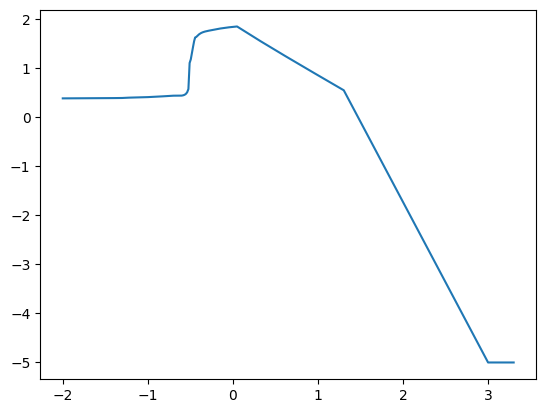

/tmp/ipykernel_666574/1308360102.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(trajectories[:, 0]), np.log10(trajectories[:, 2]))


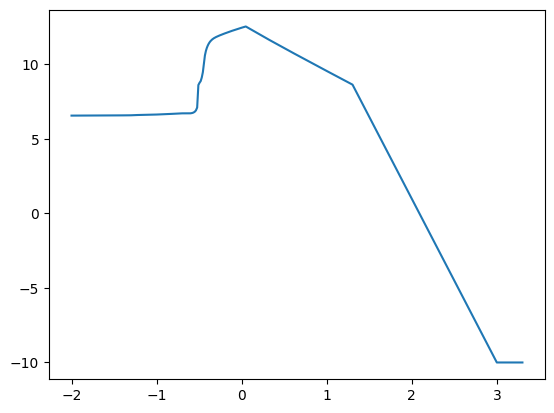

/tmp/ipykernel_666574/1308360102.py:5: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(trajectories[:, 0]), np.log10(trajectories[:, 3]))


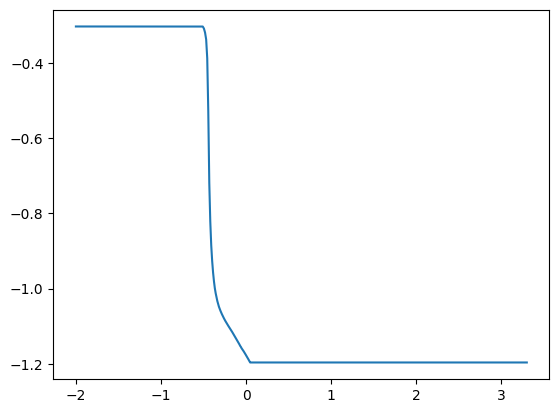

: 

: 

: 

In [ ]:
plt.plot(np.log10(trajectories[:, 0]), np.log10(trajectories[:, 1]))
plt.show()
plt.plot(np.log10(trajectories[:, 0]), np.log10(trajectories[:, 2]))
plt.show()
plt.plot(np.log10(trajectories[:, 0]), np.log10(trajectories[:, 3]))
plt.show()

: 

: 

: 

In [ ]:
iso = "fe54"
plt.plot(output["mass"], output[iso])
plt.plot(output["mass"], output["neut"])
plt.xlabel("Mass (M☉)")
plt.ylabel(iso);
#print(output.columns.values)

NameError: name 'output' is not defined

: 

: 

: 

In [ ]:
output.columns[np.argmax(output.iloc[40, 1:].values) + 1]

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

In [ ]:
#for chk in range(len(profile.coords["chk"])):
#plt.plot(profile.coords["time"], profile["mass"][-1, :], label = "mass");
#plt.plot(profile.coords["zone"], np.log10(profile["dens"][-1, :]) - 11, label = "dens");
#    break
#plt.legend();
#for mass in range(len(tracers.coords["mass"])):
#    plt.plot(tracers.coords["time"], tracers["r"][:, mass], label = tracers.coords["mass"].values[[mass]]);
#plt.legend();

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 